In [1]:
import jax.numpy as jnp
from jax.random import key, uniform
import numpy as np
from ppptm.nodes.ppvar_rw import sample_array
from ppptm.util.locs import unit_grid
from ppptm.bspline.onion import OnionKnots, OnionSpline
import pandas as pd
import plotnine as p9
import jax

jax.config.update("jax_enable_x64", True)

In [2]:
D = 10
knots = OnionKnots(-4.0, 4.0, nparam=D).knots
bs = OnionSpline(knots)

In [3]:
locs = unit_grid()
coef = sample_array(
    ilocs=locs.ordered_subset,
    slocs=locs.ordered,
    D=D,
    n=1,
    length_scale=0.1,
    amplitude=0.05,
)
print(coef.shape)

(1, 100, 10)


In [6]:
x = jnp.linspace(-8.0, 8.0, 300)
fx, fx_deriv = bs.dot_and_deriv(jnp.expand_dims(x, -1), coef.squeeze())
print(fx.shape)
print(fx_deriv.shape)

(300, 100, 1)
(300, 100, 1)


In [7]:
locsdf = pd.DataFrame(locs.ordered, columns=["lon", "lat"]).reset_index(names="loc")

In [8]:
nsamp, nloc, nobs = fx.shape

fx_long = jnp.reshape(fx, (nsamp * nloc, nobs))
df = pd.DataFrame(fx_long.T)
df["x"] = x
df["nobs"] = np.arange(x.shape[0])
df = df.melt(id_vars=["x", "nobs"], var_name="loc")
# df["sample"] = np.repeat(np.arange(nsamp), )
df = pd.merge(df, locsdf, on="loc")
df["loc"] = df["loc"].astype(int)
df

ValueError: Length of values (300) does not match length of index (1)

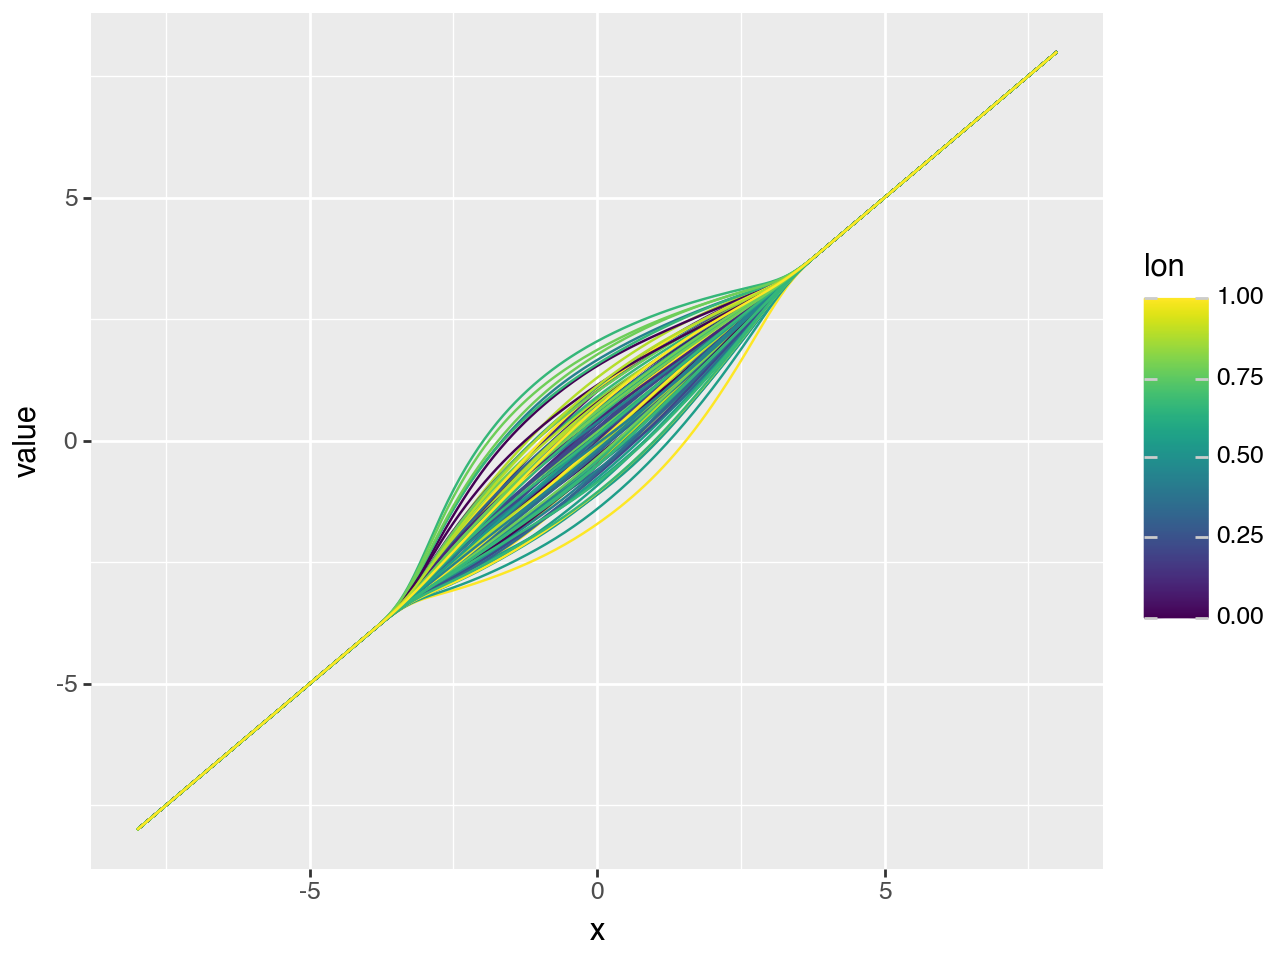

In [7]:
(p9.ggplot(df) + p9.geom_line(p9.aes("x", "value", group="loc", color="lon")))

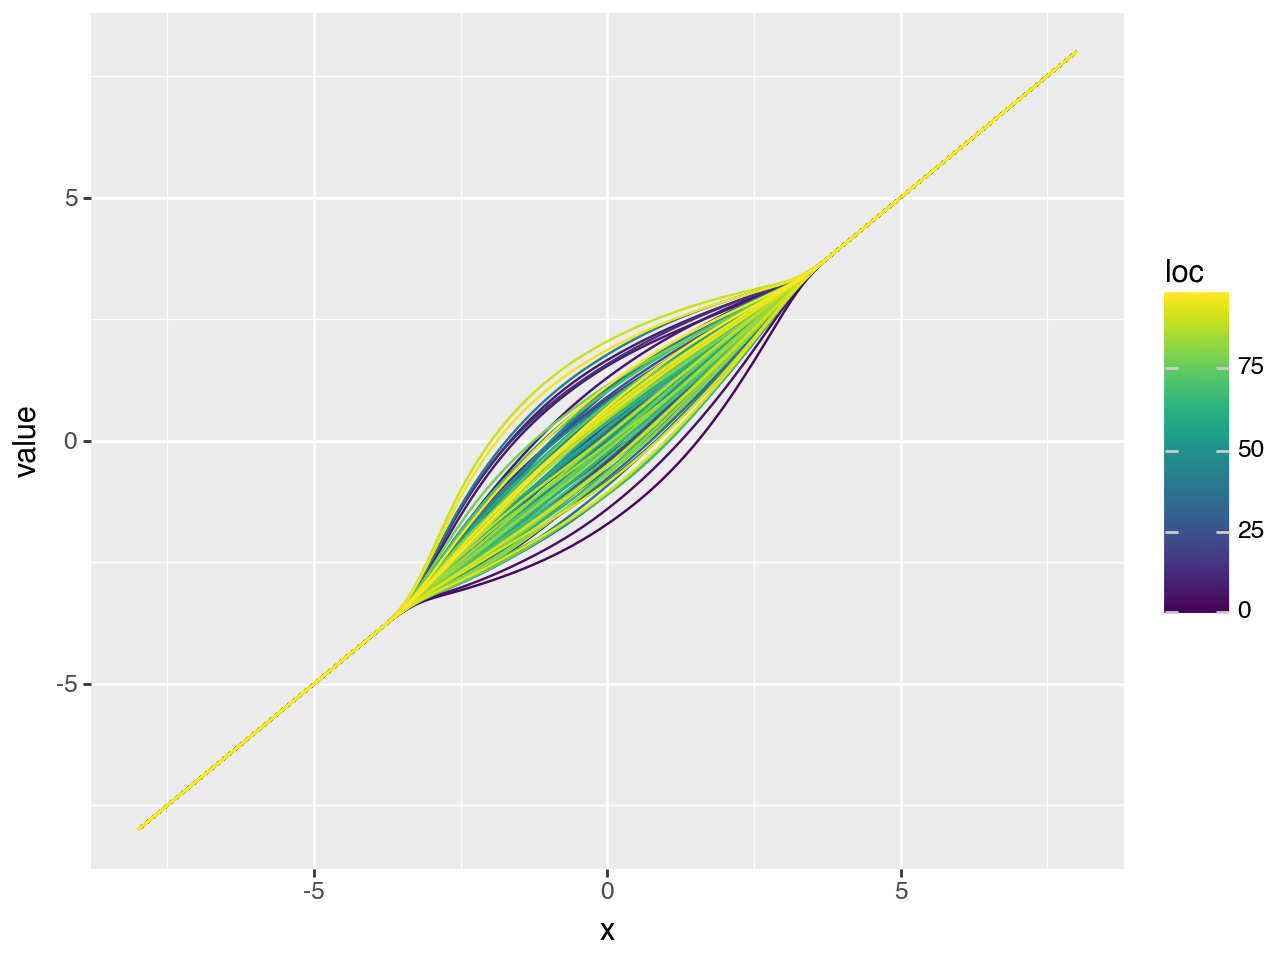

In [8]:
(p9.ggplot(df) + p9.geom_line(p9.aes("x", "value", group="loc", color="loc")))

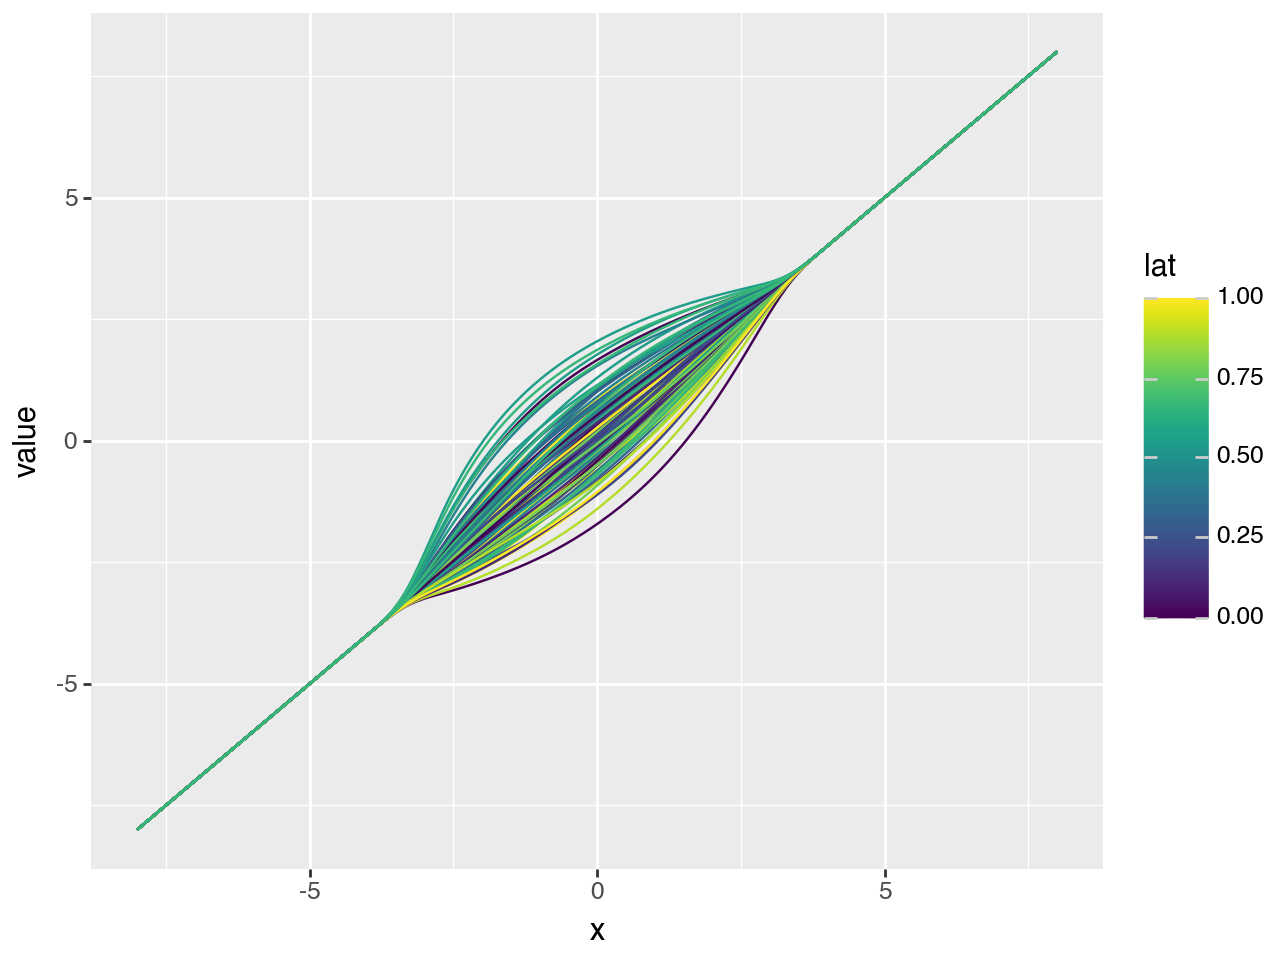

In [9]:
(p9.ggplot(df) + p9.geom_line(p9.aes("x", "value", group="loc", color="lat")))

In [10]:
n = 98
nloc = locs.nloc
x = uniform(key(42), (n, nloc), minval=-4.0, maxval=4.0)
x.shape

(98, 100)

In [11]:
coef.shape

(1, 100, 10)

In [12]:
fx, fx_deriv = bs.dot_and_deriv(x.T, coef.squeeze(0))
print(fx.shape)
print(fx_deriv.shape)

(100, 98)
(100, 98)


In [50]:
dfx = pd.DataFrame(x)
dfx = dfx.reset_index(names="nobs")
dfx = dfx.melt(id_vars=["nobs"], var_name="loc", value_name="x")
dfx

,nobs,loc,x
0,0,0,-0.586179
1,1,0,-2.461896
2,2,0,-3.677706
3,3,0,-1.634685
4,4,0,0.119692
...,...,...,...
9795,93,99,0.153907
9796,94,99,1.071887
9797,95,99,1.820571
9798,96,99,2.665190


In [51]:
nloc, nobs = fx.shape

fx_long = jnp.reshape(fx, (nloc, nobs))
df = pd.DataFrame(fx_long.T)
df["nobs"] = np.arange(x.shape[0])
df = df.melt(id_vars=["nobs"], var_name="loc")
df = pd.merge(df, dfx, on=["nobs", "loc"])
df = pd.merge(df, locsdf, on="loc")
df

,nobs,loc,value,x,lon,lat
0,0,0,-0.985816,-0.586179,0.444444,0.444444
1,1,0,-2.610740,-2.461896,0.444444,0.444444
2,2,0,-3.679897,-3.677706,0.444444,0.444444
3,3,0,-1.914900,-1.634685,0.444444,0.444444
4,4,0,-0.276978,0.119692,0.444444,0.444444
...,...,...,...,...,...,...
9795,93,99,0.840438,0.153907,1.000000,0.666667
9796,94,99,1.702182,1.071887,1.000000,0.666667
9797,95,99,2.295454,1.820571,1.000000,0.666667
9798,96,99,2.881515,2.665190,1.000000,0.666667


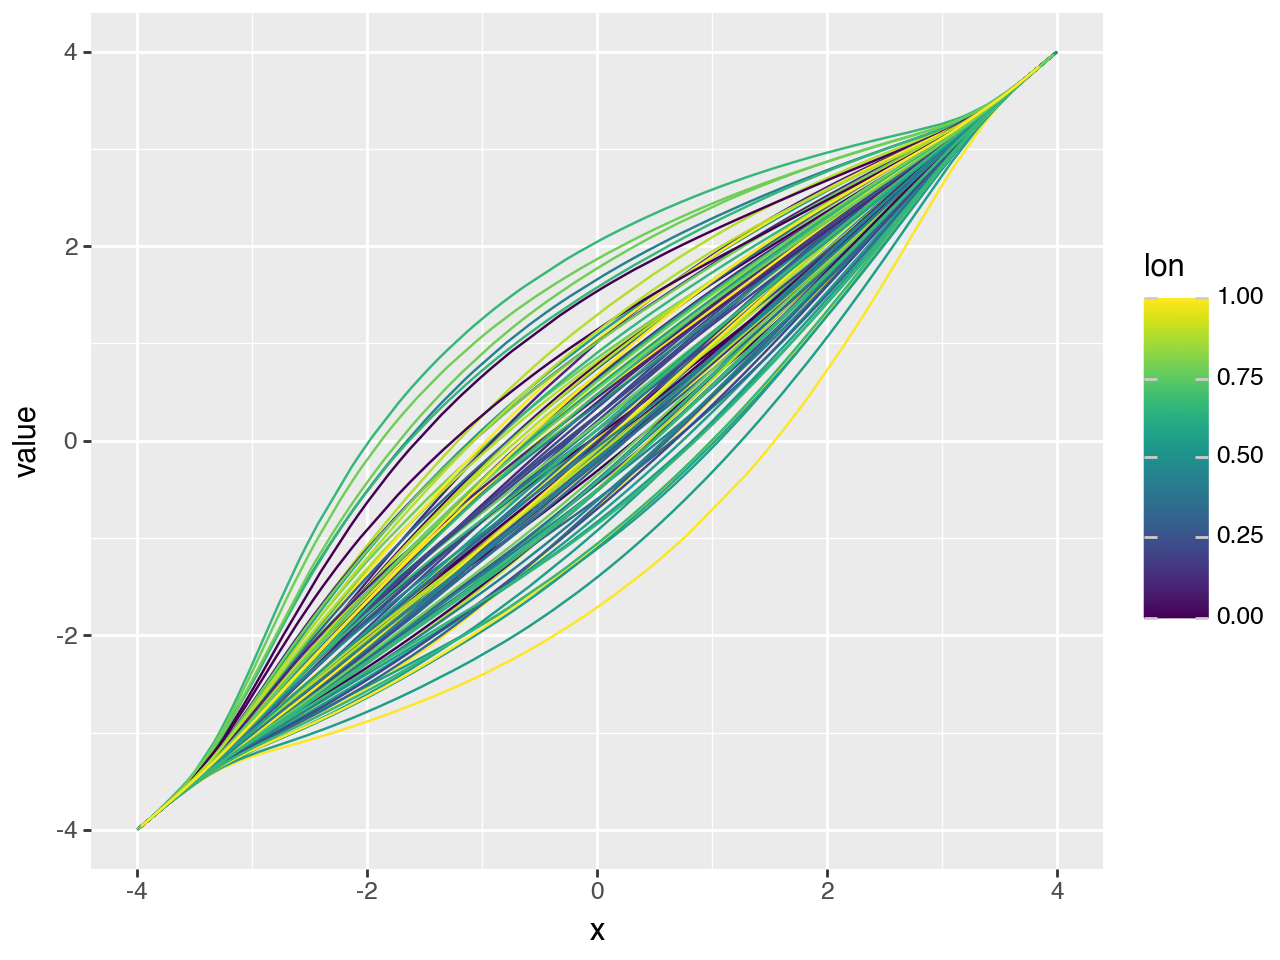

In [52]:
(p9.ggplot(df) + p9.geom_line(p9.aes("x", "value", group="loc", color="lon")))